#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.6-cp36-none-any.whl size=8525 sha256=e3e06b171fcc8cdf316aad5348cfae7a8448bd1e9e6cce436330564c888c2c0e
  Stored in directory: /root/.cache/pip/wheels/b8/c6/01/330066e36e1f7c826c96f656f9185822cfcdef0591315949ea
Successfully built MiniSom


## Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing the dataset

In [3]:
df = pd.read_csv('Credit_Card_Applications.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### Exploratory Data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [5]:
df.isna().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,690.0,1.569047e+07,71506.473912,15565714.00,1.563169e+07,1.569016e+07,1.575190e+07,15815443.00
A1,690.0,6.782609e-01,0.467482,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
A2,690.0,3.156820e+01,11.853273,13.75,2.267000e+01,2.862500e+01,3.770750e+01,80.25
A3,690.0,4.758725e+00,4.978163,0.00,1.000000e+00,2.750000e+00,7.207500e+00,28.00
A4,690.0,1.766667e+00,0.430063,1.00,2.000000e+00,2.000000e+00,2.000000e+00,3.00
A5,690.0,7.372464e+00,3.683265,1.00,4.000000e+00,8.000000e+00,1.000000e+01,14.00
A6,690.0,4.692754e+00,1.992316,1.00,4.000000e+00,4.000000e+00,5.000000e+00,9.00
A7,690.0,2.223406e+00,3.346513,0.00,1.650000e-01,1.000000e+00,2.625000e+00,28.50
A8,690.0,5.231884e-01,0.499824,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00
A9,690.0,4.275362e-01,0.495080,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.00


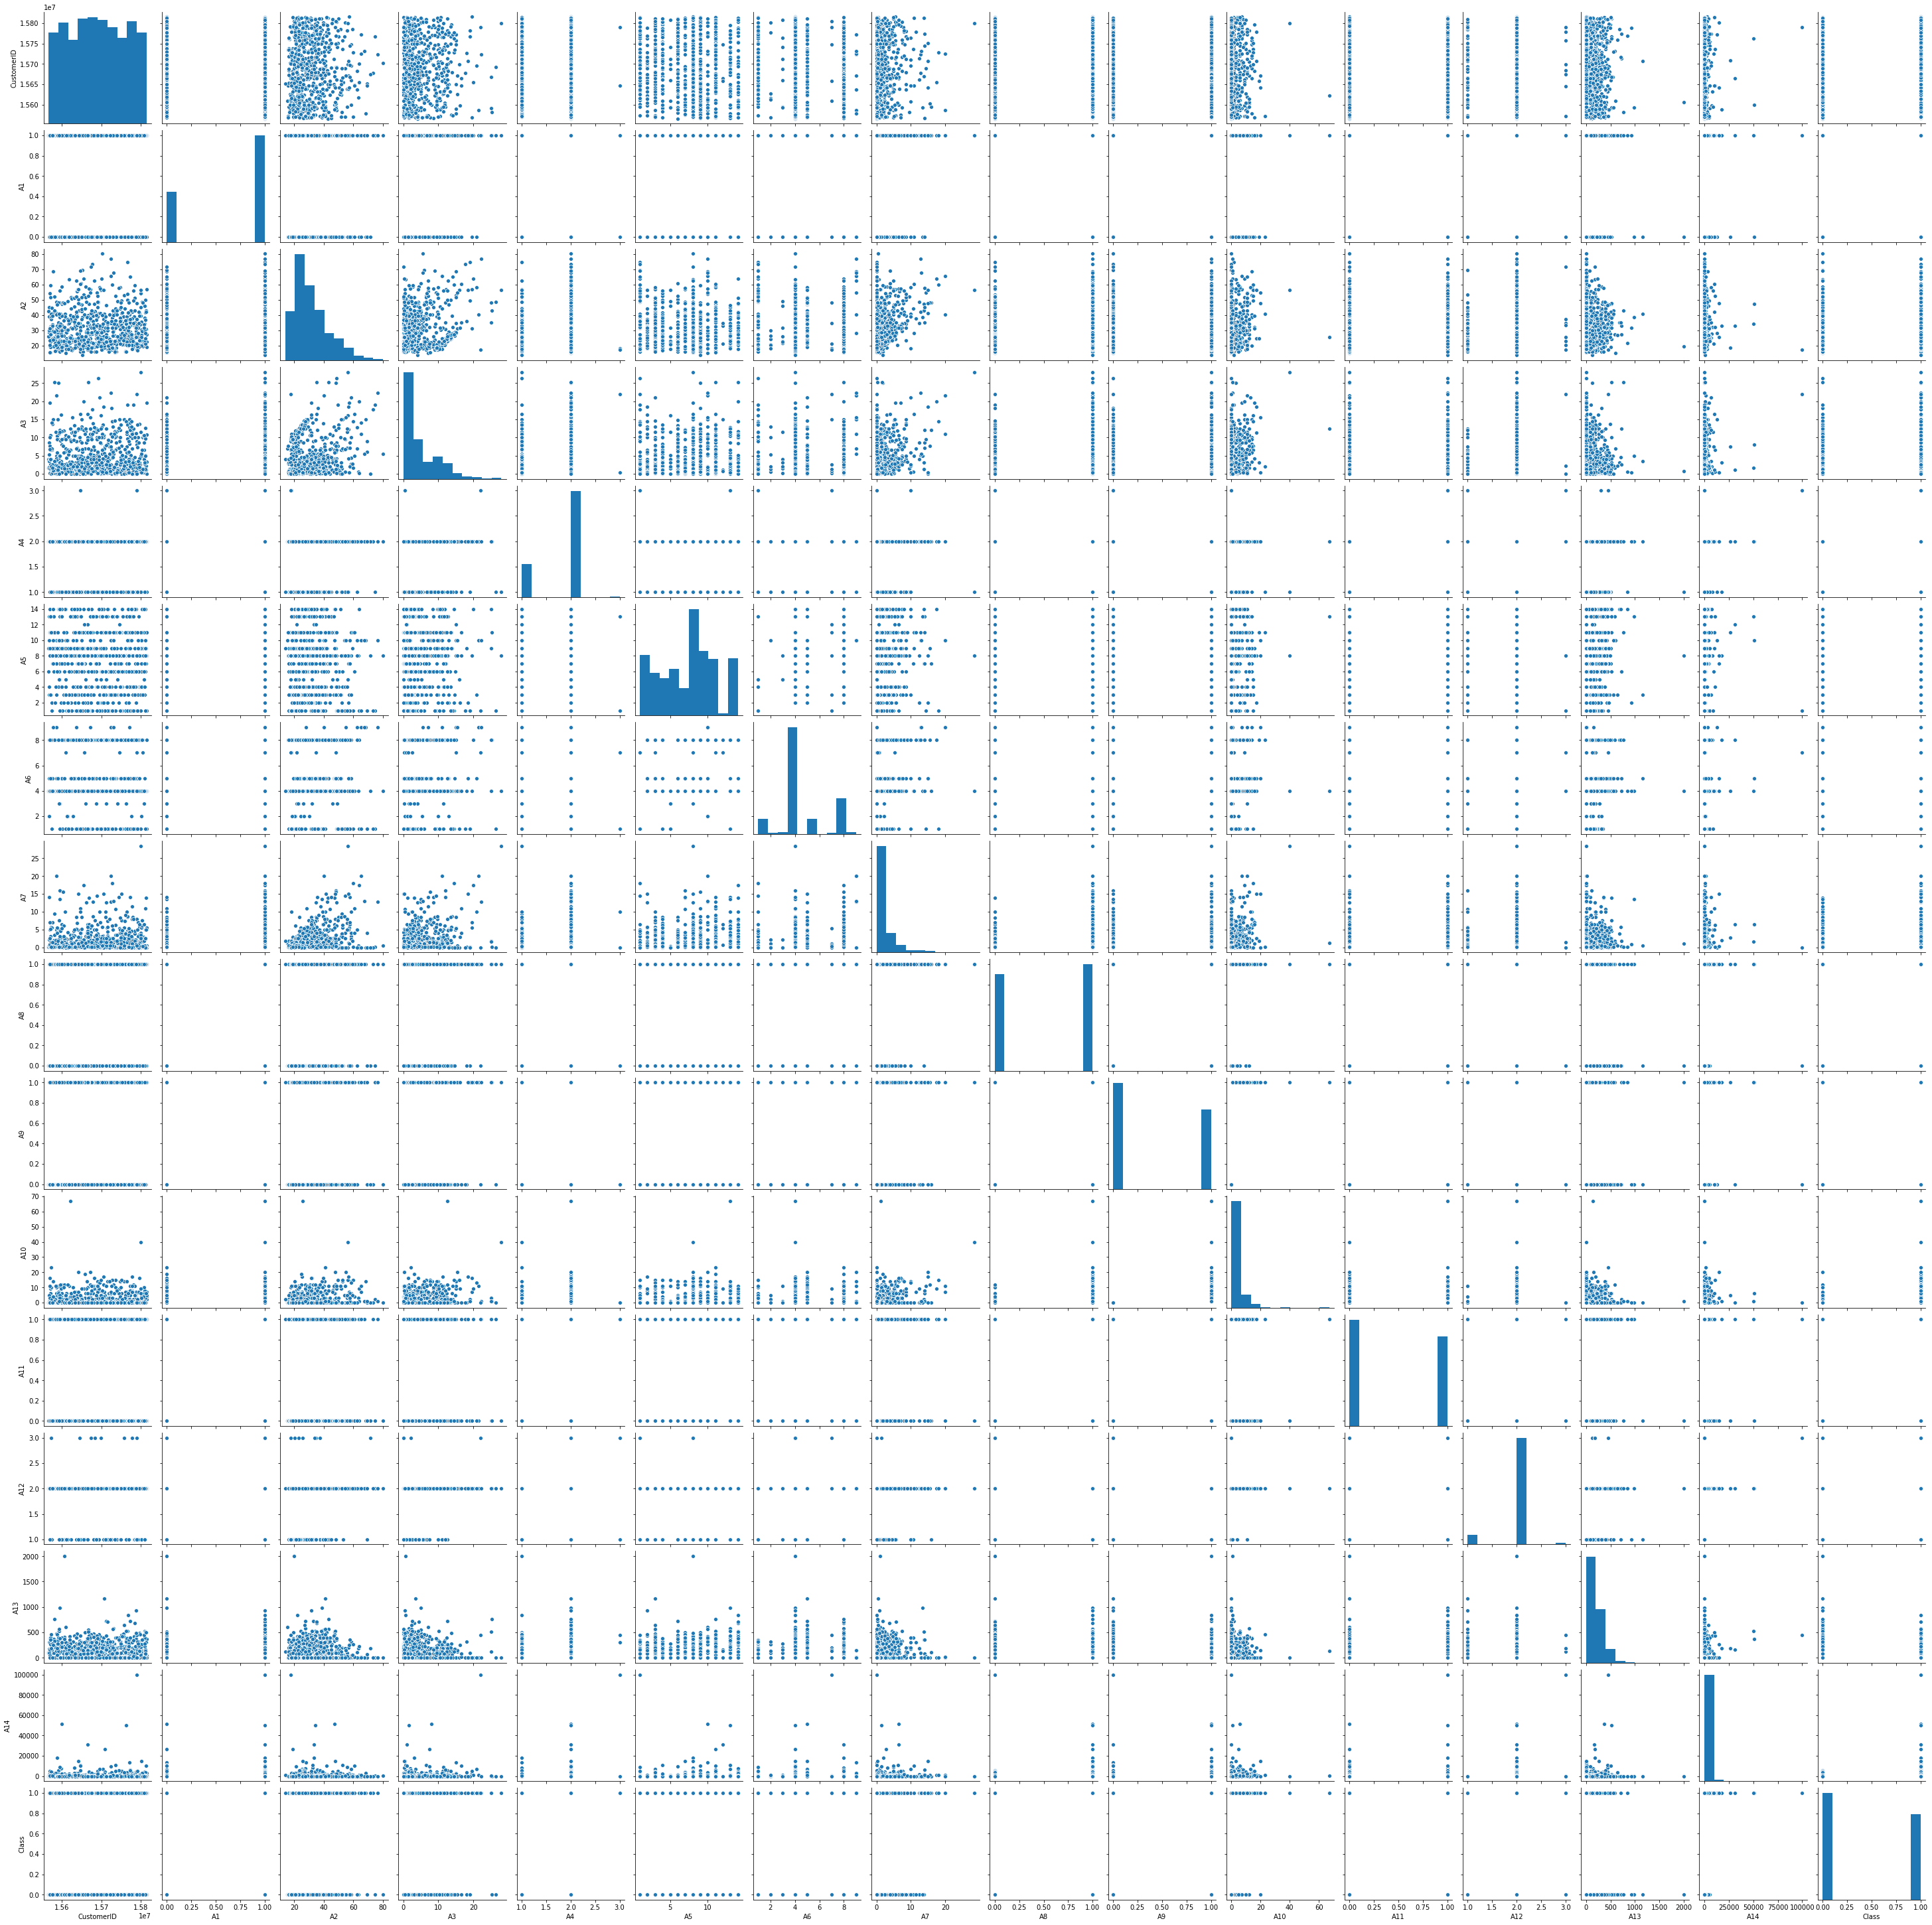

In [7]:
sns.pairplot(df)

In [8]:
df.corr()['Class'].sort_values(ascending=False)

Class         1.000000
A8            0.720407
A9            0.458301
A10           0.406410
A5            0.373712
A7            0.322475
A6            0.246567
A3            0.206294
A4            0.194306
A14           0.175657
A2            0.161626
A12           0.115261
CustomerID    0.035400
A11           0.031625
A1           -0.013897
A13          -0.099972
Name: Class, dtype: float64

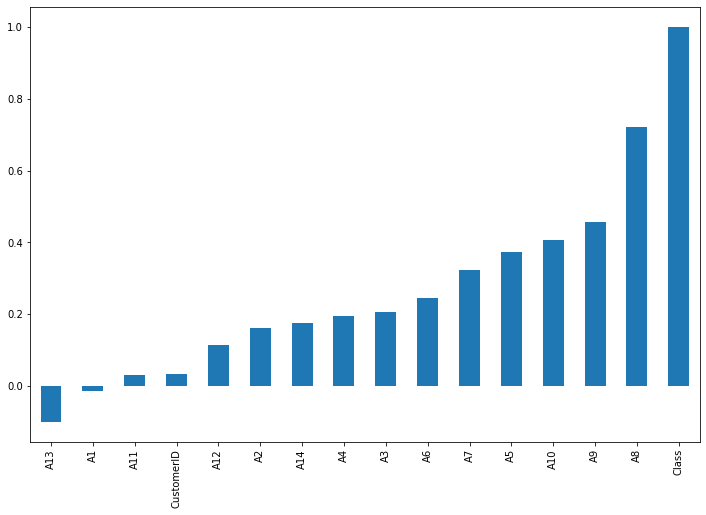

In [9]:

plt.figure(figsize=(12,8))
df.corr()['Class'].sort_values().plot(kind='bar')

In [10]:
df.corr().T

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
CustomerID,1.000000,-0.017669,0.001531,0.048405,0.071517,-0.053314,-0.056552,0.055084,0.041009,0.019781,-0.006900,-0.002839,0.015464,-0.020295,0.040060,0.035400
A1,-0.017669,1.000000,0.036659,-0.028166,-0.063528,-0.005321,0.052658,0.097009,0.000918,-0.063256,-0.008427,0.053984,-0.059901,0.058595,0.003616,-0.013897
A2,0.001531,0.036659,1.000000,0.201315,0.089503,-0.093877,0.028510,0.392788,0.204342,0.083680,0.185574,0.054779,0.020703,-0.077159,0.018539,0.161626
A3,0.048405,-0.028166,0.201315,1.000000,0.091526,0.027665,0.094504,0.298902,0.244317,0.174846,0.271207,-0.013023,0.093752,-0.222346,0.123121,0.206294
A4,0.071517,-0.063528,0.089503,0.091526,1.000000,0.088846,0.046639,0.080624,0.129863,0.162464,0.106457,0.004964,0.006400,-0.001758,0.120065,0.194306
A5,-0.053314,-0.005321,-0.093877,0.027665,0.088846,1.000000,0.402284,0.144757,0.311833,0.222957,0.150166,0.024738,0.070222,0.088140,0.030735,0.373712
A6,-0.056552,0.052658,0.028510,0.094504,0.046639,0.402284,1.000000,0.240400,0.246193,0.080397,0.098841,0.093641,0.036435,0.070662,0.064841,0.246567
A7,0.055084,0.097009,0.392788,0.298902,0.080624,0.144757,0.240400,1.000000,0.345689,0.222982,0.322330,0.138139,-0.016297,-0.076389,0.051345,0.322475
A8,0.041009,0.000918,0.204342,0.244317,0.129863,0.311833,0.246193,0.345689,1.000000,0.432032,0.379532,0.091276,0.045054,-0.067387,0.090012,0.720407
A9,0.019781,-0.063256,0.083680,0.174846,0.162464,0.222957,0.080397,0.222982,0.432032,1.000000,0.571498,0.017043,0.176097,-0.053321,0.077652,0.458301


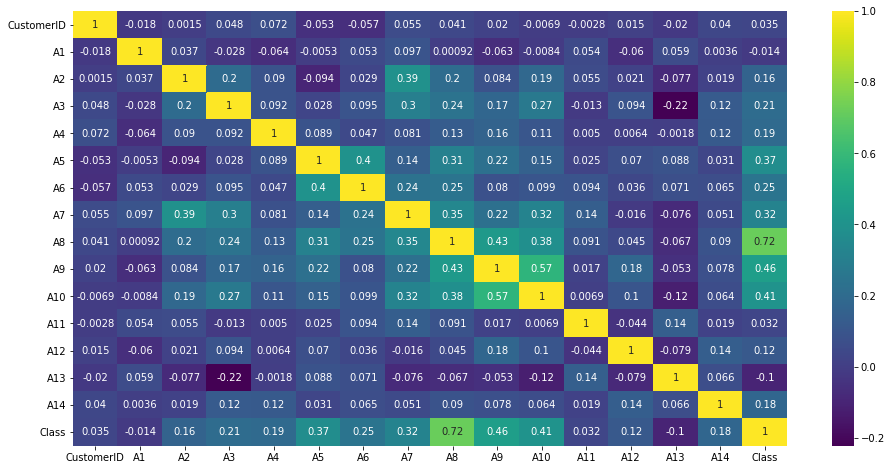

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True, cmap='viridis')

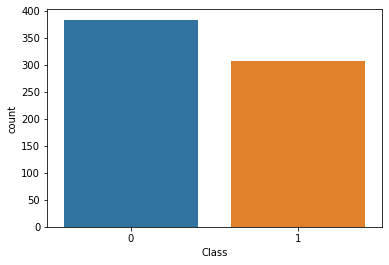

In [12]:
sns.countplot(x='Class',data=df) 

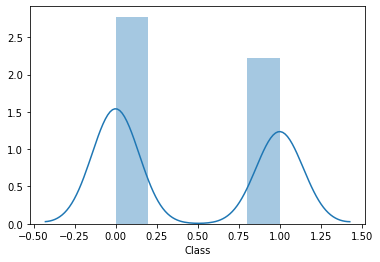

In [13]:
sns.distplot(df['Class']) 

In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Feature Scaling


In [15]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [16]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


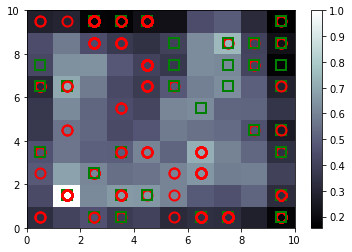

In [17]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [18]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(8,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [19]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15662854
15610042
15568162
15638983
15662152
15623210
15734578
15570508
15795527
15641733
15660144
15603565
15664720
15627328
15645820
15800554
15617991
15696120
15567919
15687634
15638751
15641007
15665014
15606554
15609356
15588123
15775750
15572390
15575243
15768474
15631693
15646563
15652048
15594651


#Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [20]:
customers = df.iloc[:, 1:].values

## Create Dependent Variable

In [21]:
is_fraud = np.zeros(len(df))
for i in range(len(df)):
  if df.iloc[i,0] in frauds:
    is_fraud[i] = 1

#ANN

### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [23]:
import tensorflow as tf
tf.__version__

'2.3.0'

## Initializing the ANN

In [24]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [25]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 832us/step - loss: 0.6341 - accuracy: 0.7333
Epoch 2/10
690/690 [==============================] - 1s 856us/step - loss: 0.3585 - accuracy: 0.9319
Epoch 3/10
690/690 [==============================] - 1s 833us/step - loss: 0.2714 - accuracy: 0.9478
Epoch 4/10
690/690 [==============================] - 1s 861us/step - loss: 0.2346 - accuracy: 0.9493
Epoch 5/10
690/690 [==============================] - 1s 826us/step - loss: 0.2139 - accuracy: 0.9507
Epoch 6/10
690/690 [==============================] - 1s 788us/step - loss: 0.1997 - accuracy: 0.9507
Epoch 7/10
690/690 [==============================] - 1s 838us/step - loss: 0.1885 - accuracy: 0.9507
Epoch 8/10
690/690 [==============================] - 1s 785us/step - loss: 0.1785 - accuracy: 0.9507
Epoch 9/10
690/690 [==============================] - 1s 787us/step - loss: 0.1702 - accuracy: 0.9507
Epoch 10/10
690/690 [==============================] - 1s 832us/step - loss: 0.161

## Predicting test set results

In [26]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((df.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [27]:
print(y_pred)

[[1.55941330e+07 4.09377317e-05]
 [1.56769090e+07 6.12194272e-05]
 [1.57997850e+07 7.91740531e-05]
 ...
 [1.56058720e+07 1.96443439e-01]
 [1.55861740e+07 2.17313141e-01]
 [1.56093560e+07 2.33655363e-01]]
